# Individual Planning Report  

Ariel Zhang  
59003970  
DSCI 100

## 1. Data Description

**Dataset Overview**
- Number of Observations: 196
- Variables: 7  
- Unit of observation: One row per player

**Variables Summary**
| Variable | Type | Description | Use in Analysis |
|-----------|------|-------------|----------------|
| `experience` | Categorical | Player’s self-reported skill level | Explanatory variable |
| `subscribe` | Logical | Whether player subscribed to the newsletter | Not used for this analysis |
| `hashedEmail` | Character | Email ID | Not used |
| `played_hours` | Double | Total hours the player spent in game | Response variable |
| `name` | Character | Player’s name | Not used |
| `gender` | Categorical | Player’s gender | Explanatory variable |
| `Age` | Integer | Player’s age in years | Explanatory variable |

**Summary Statistics**
| Variable | Mean |
|-----------|------|
| `played_hours` | 5.90 | 
| `Age` | 21.14 | 

**Issues in the Data**
- Some values for age were missing
- The experience level pro has very few players, which can make averages less accurate 
- Experience level is self-reported, so players might not have rated themselves consistently

**Potential Data Collection Issues**
- Players might have been idle, which could make playtime less accurate
- The dataset may include more active players


## 2. Questions

**Broad Question:**   
We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts

**Specific Question:**  
Can a player’s age, gender, and experience level predict the total number of hours they have played in the minecraft server?

**Description:**  
This question explores which types of players contribute most to engagement on the Minecraft research server. We use only the `players.csv` dataset, which includes each player’s age, gender, experience level, and total hours played. The response variable is `played_hours`, representing the total time spent in the game, and the explanatory variables are `Age`, `gender`, and `experience`.    

Before analysis, the dataset will be tidied by removing unnecessary columns and missing values, and converting character variables into factors for regression.



## 3. Exploratory Data Analysis and Visualization

### Load and preview data:

In [1]:
#Load tidyverse
library(tidyverse)

#Load dataset into R
players  <- read_csv("players.csv")

#Preview data
head(players)
                

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


### Minimum Wrangling:

In [2]:
#Keep only data used for analysis
players_tidy <- players |>
                select(experience, played_hours, gender, Age) |>
                drop_na() |>
                mutate(experience = as_factor(experience)) |>
                mutate(gender = as_factor(gender))

head(players_tidy)

experience,played_hours,gender,Age
<fct>,<dbl>,<fct>,<dbl>
Pro,30.3,Male,9
Veteran,3.8,Male,17
Veteran,0.0,Male,17
Amateur,0.7,Female,21
Regular,0.1,Male,21
Amateur,0.0,Female,17


#### Mean Values for Each Quantitative Variable in `players.csv`:

In [3]:
#Summarize mean values for quantitative variables
mean_players <- players_tidy |>
                summarize(mean_age = round(mean(Age, na.rm = TRUE), 2),
                mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2))
mean_players


mean_age,mean_played_hours
<dbl>,<dbl>
21.14,5.9


### Visualizations:

#### Scatterplot: Relationship Between Total Playtime and Age

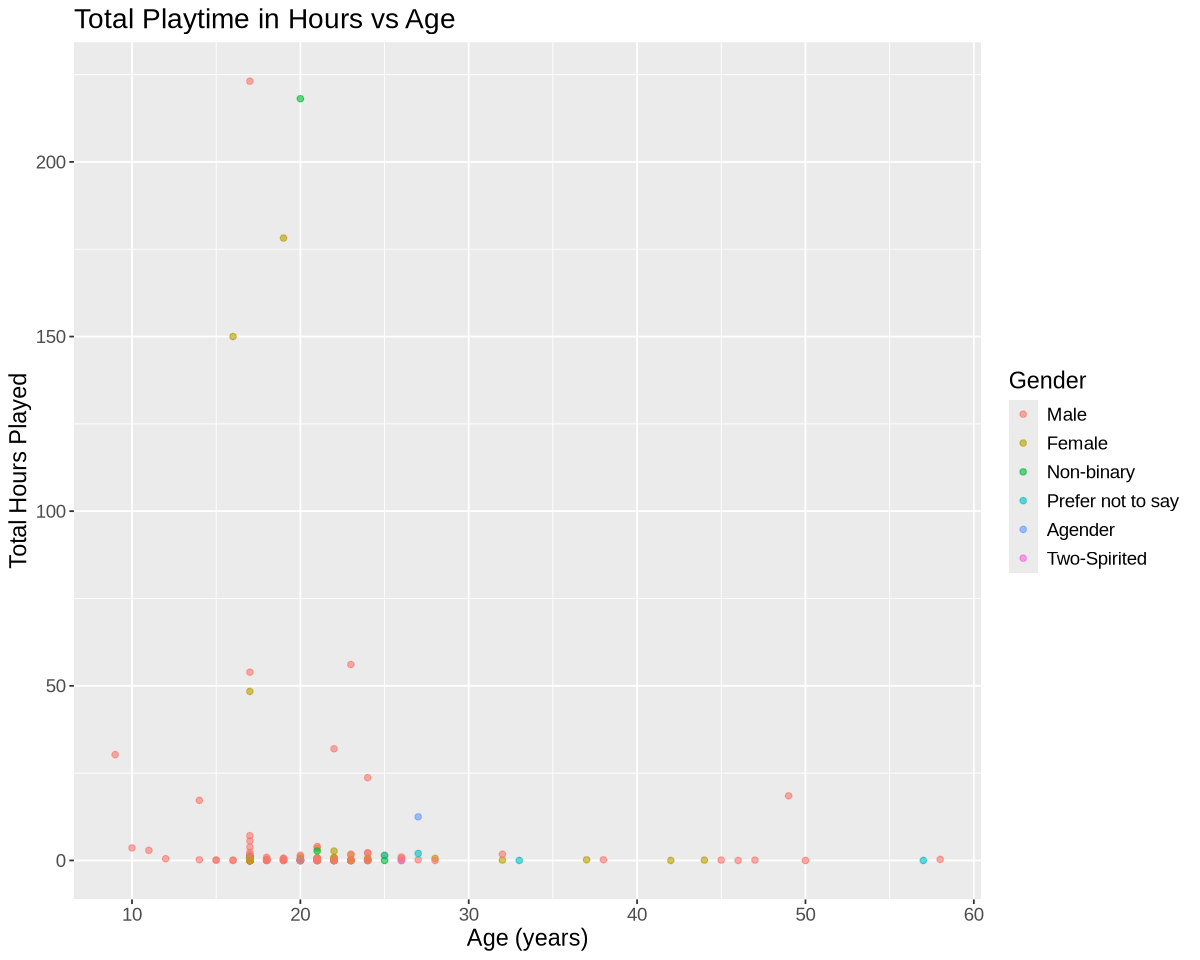

In [4]:
options(repr.plot.width = 10, repr.plot.height = 8)
age_play_time_plot <- players_tidy |>
            ggplot(aes(x = Age, y = played_hours, color = gender)) +
            geom_point(alpha = 0.6) +
            labs(x = "Age (years)",
                 y = "Total Hours Played",
                 color = "Gender",
                 title = "Total Playtime in Hours vs Age")+
            theme(text = element_text(size = 14))
age_play_time_plot


This scatterplot shows the relationship of total in-game playtime (in hours) vs player age, with different colours indicating gender. From the plot, we can see that most players under 30 years old have low total playtime. However, there are a few younger players who show higher playtime values. There is no strong relationship between age and total playtime as points are scattered, but younger players are more likely to spend a longer time playing the game. Gender does not seem to have a large effect on total playtime overall.


#### Bar plot: Relationship Between Total Playtime and Experience Level

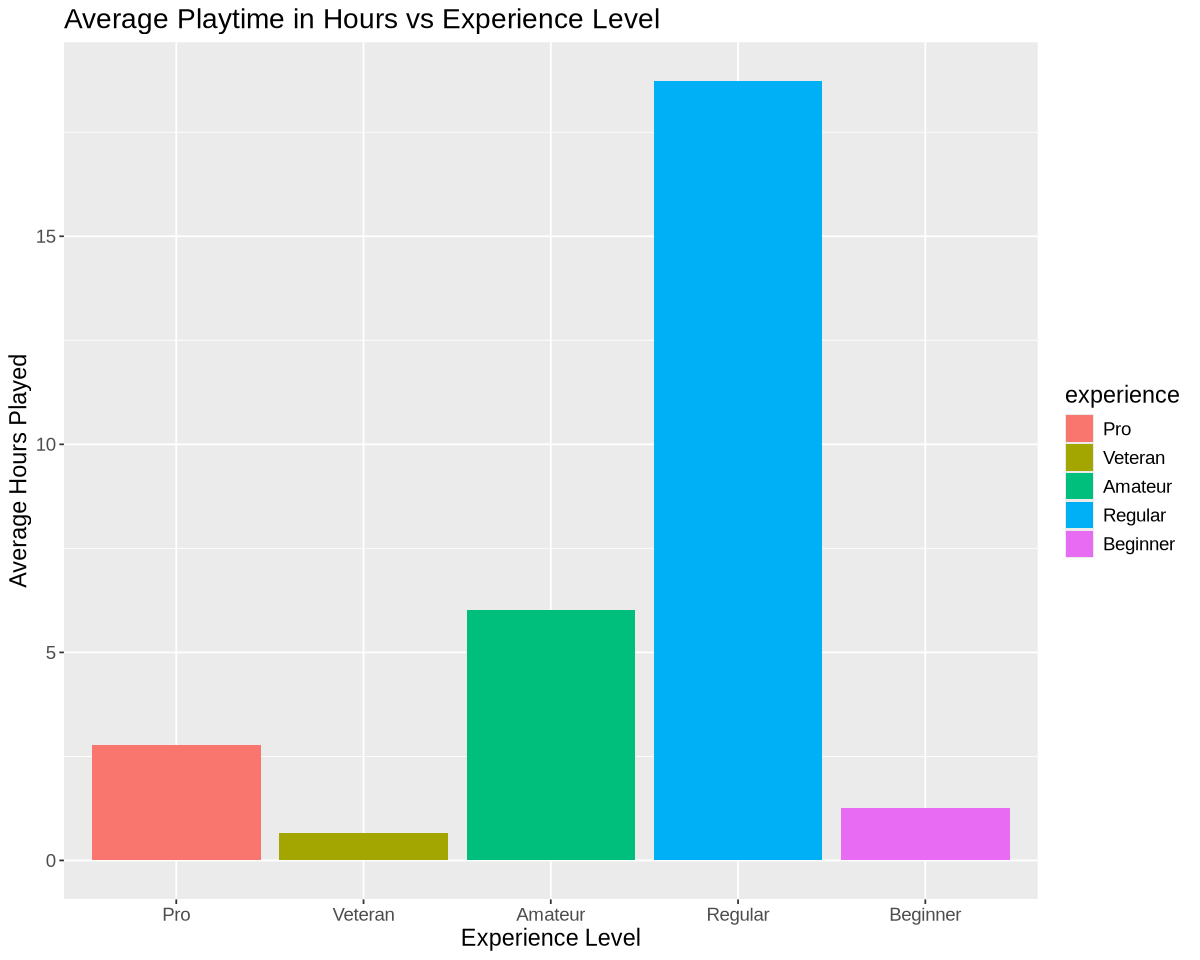

In [5]:
options(repr.plot.width = 10, repr.plot.height = 8)
mean_experience <- players_tidy |>
                group_by(experience) |>
                summarize(mean_played_hours = mean(played_hours, na.rm = TRUE))
                    
experience_play_time_plot <- mean_experience |>
                    ggplot(aes(x = experience, y = mean_played_hours, fill = experience)) +
                    geom_bar(stat = "identity") +
                    labs(x = "Experience Level", 
                         y = "Average Hours Played", 
                         title = "Average Playtime in Hours vs Experience Level") +
                    theme(text = element_text(size = 14))
experience_play_time_plot

This bar plot shows the average total in-game playtime for players across different experience levels. Players who report themselves as regular or amateur tend to have higher total average playtime than beginners, veterans, and pros. This shows that mid-level players spend a longer time in the game, which could be because they are still looking to improve and explore the game more. These results indicate that experience level does influence how much time players spend in-game, making it a useful variable for predicting data contribution.

## 4. Methods and Plans

I will use **linear regression** to predict total `played_hours` from player characteristics including `Age`, `experience`, and `gender`.

This method is appropriate because the response variable is numeric, and linear regression helps identify which player characteristics are most related to higher engagement and longer playtime.

Linear regression assumes that relationships between variables are roughly linear. It also assumes that the model’s mistakes should stay the same for all predictions, and one player’s playtime should not depend on another player’s.

A limitation is that linear regression may not capture non-linear patterns or handle outliers well. I will compare results with a K-Nearest Neighbors model, which can model more flexible relationships. The best value of k will be chosen using cross-validation by selecting the value that gives the lowest RMSPE.

The data will be split into 80% training and 20% testing sets. No separate validation set will be used because we are using cross-validation. Models will be checked using RMSPE, and 5-fold cross-validation will be used to ensure consistent performance. The final model will be chosen based on the lowest RMSPE, which shows the most accurate predictions.

## 5. GitHub Repository

https://github.com/ariielz/individual_planning.git